### **Redes Neurais Recorrentes (RNNs)**

As Redes Neurais Recorrentes (RNNs) são um tipo de rede neural projetada para processar sequências de dados, como séries temporais ou textos. A principal característica das RNNs é a capacidade de manter um estado interno que captura informações sobre as entradas anteriores, permitindo que a rede tenha "memória" dos passos anteriores na sequência.

A cada passo de tempo $t$, a RNN atualiza seu estado oculto $h_t$ com base na entrada atual $x_t$ e no estado oculto anterior $h_{t-1}$:

$$
h_t = \tanh(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

Aqui:
- $W_{ih}$ é a matriz de pesos que conecta a entrada ao estado oculto.
- $W_{hh}$ é a matriz de pesos que conecta o estado oculto anterior ao atual.
- $b_h$ é o termo de bias.
- $\tanh$ é a função de ativação que introduz não-linearidade.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### **Implementação de uma Célula RNN**

Nesta seção, implementaremos uma célula RNN personalizada usando o PyTorch. A célula RNN é a unidade básica de uma RNN, responsável por calcular o novo estado oculto com base na entrada atual e no estado oculto anterior.

#### **Explicação do Código**

O código a seguir define uma célula RNN personalizada:

- **Entrada:** O tamanho da entrada `input_size` e o tamanho do estado oculto `hidden_size`.
- **Pesos:** $ W_{ih} $ e $ W_{hh} $ são as matrizes de pesos, e $ b_h $ é o bias.
- **Saída:** A célula computa o novo estado oculto $ h_t $ a partir da entrada e do estado oculto anterior.

In [4]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_ih = nn.Linear(input_size, hidden_size, bias=False) # Define a matriz de pesos de entrada
        self.W_hh = nn.Linear(hidden_size, hidden_size, bias=False) # Define a matriz de pesos de saída
        self.b_h = nn.Parameter(torch.zeros(hidden_size)) # Define o bias

    def forward(self, x, h):
        # x: (batch_size, input_size)
        # h: (batch_size, hidden_size)
        ht = torch.tanh(self.W_ih(x) + self.W_hh(h) + self.b_h)
        return ht

### **Exemplo de Uso da Célula RNN**

Inicialmente, definimos uma célula RNN com um tamanho de entrada de 10 e um tamanho de estado oculto de 4.

In [5]:
# Exemplo
input_size = 10
hidden_size = 4

rnn_cell = RNNCell(input_size, hidden_size)

### **Inspeção dos Parâmetros da Célula RNN**

Neste trecho de código, vamos inspecionar os parâmetros da célula RNN que acabamos de definir. Em uma rede neural, os parâmetros são os valores ajustáveis (como os pesos e bias) que a rede aprende durante o treinamento.

Ao executar o código, veremos os nomes e as formas dos parâmetros:

- **`W_ih`**: Matriz de pesos conectando a entrada ao estado oculto.
- **`W_hh`**: Matriz de pesos conectando o estado oculto anterior ao atual.
- **`b_h`**: Termo de bias para o estado oculto.

In [6]:
for name, param in rnn_cell.named_parameters():
    print(name, param.shape)

b_h torch.Size([4])
W_ih.weight torch.Size([4, 10])
W_hh.weight torch.Size([4, 4])


#### **Explicação do Código**

No exemplo abaixo:
- Inicializamos uma entrada $x$ aleatória e um estado oculto inicial $h$ como zero.
- A célula RNN processa a entrada e gera um novo estado oculto.

In [7]:
x = torch.randn(input_size)
h = torch.zeros(hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([4])

### **Processamento de Sequências com RNN**

RNNs são projetadas para processar sequências de dados, onde cada passo de tempo depende dos passos anteriores. Vamos demonstrar isso processando uma sequência de entradas com a célula RNN.

#### **Explicação do Código**

Neste exemplo:
- Processamos uma sequência de 3 entradas $x$ e atualizamos o estado oculto $h$ a cada passo.
- O estado oculto é propagado ao longo da sequência, capturando informações temporais.

In [8]:
# Sequences
seq_len = 3

x = torch.randn(seq_len, input_size)
h = torch.zeros(hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[i], h)
    print(f"Passo {i+1}")
    print(f"h = {h}")
    print()

Passo 1
h = tensor([ 0.3616, -0.5110, -0.6401, -0.5828], grad_fn=<TanhBackward0>)

Passo 2
h = tensor([-0.1302, -0.9682, -0.8875, -0.9346], grad_fn=<TanhBackward0>)

Passo 3
h = tensor([-0.7480,  0.2771, -0.1088,  0.6735], grad_fn=<TanhBackward0>)



### **Processamento de Sequências em Lote (Batched RNN)**

Para aumentar a eficiência, as RNNs podem processar várias sequências simultaneamente, usando o conceito de "batching". Cada sequência no lote é processada de forma independente, mas compartilhando os mesmos pesos da RNN.

#### **Explicação do Código**

Neste exemplo:
- Criamos um batch de 8 sequências, cada uma com 10 entradas.
- A célula RNN é aplicada ao batch, atualizando o estado oculto para cada sequência de forma paralela.

In [9]:
# Batched RNN
batch_size = 8

x = torch.randn(batch_size, input_size)
h = torch.zeros(batch_size, hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([8, 4])

### **Processamento de Sequências em Lote com Múltiplos Passos de Tempo**

Aqui, processamos um batch de sequências ao longo de vários passos de tempo.

#### **Explicação do Código**

Neste exemplo:
- Processamos um lote de 8 sequências, cada uma com 3 passos de tempo.
- Em cada passo de tempo, a célula RNN atualiza o estado oculto para todas as sequências do lote.

In [10]:
# Sequences
seq_len = 3

x = torch.randn(batch_size, seq_len, input_size)
h = torch.zeros(batch_size, hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[:, i], h)
    print(f"Passo {i}")
    print(f"h = {h.shape}")
    print()

Passo 0
h = torch.Size([8, 4])

Passo 1
h = torch.Size([8, 4])

Passo 2
h = torch.Size([8, 4])



### **Construção de uma Rede RNN Completa**

Vamos expandir a célula RNN que criamos anteriormente para uma rede RNN completa. A rede RNN será composta por uma célula RNN seguida por uma camada linear que produzirá a saída final.

#### **Explicação do Código**

- **`self.cell`**: Instância da célula RNN que processará cada passo da sequência.
- **`self.W_ho`**: Camada linear que mapeia o estado oculto final para a saída desejada.

No método `forward`:
- **Entrada (`x`)**: Um tensor de forma `(batch_size, seq_len, input_size)`, onde `seq_len` é o comprimento da sequência.
- **Estado oculto (`h`)**: Se não for fornecido, é inicializado como um vetor de zeros.
- **Processamento da sequência**: A entrada é processada passo a passo pela célula RNN.
- **Saída (`y`)**: Calculada pela camada linear a partir do estado oculto final.

In [11]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.cell = RNNCell(input_size, hidden_size) # Define a célula RNN
        self.W_ho = nn.Linear(hidden_size, output_size) # Define a matriz de pesos de saída

    def forward(self, x, h=None):
        # x: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # h: (batch_size, hidden_size)
        if h is None:
            h = torch.zeros(batch_size, self.hidden_size)
        h = h.to(x.device)

        # Processa a sequência
        for i in range(seq_len):
            h = self.cell(x[:, i], h)

        # Calcula a saída
        y = self.W_ho(h)
        return y

### **Geração de Dados para Treinamento**

Para treinar a RNN, precisamos de um conjunto de dados sequenciais. Neste exemplo, geramos uma série temporal baseada em uma função senoide com ruído adicionado.

#### **Explicação do Código**

- **`x`**: Sequência de pontos no intervalo $[0, 6\pi]$.
- **`y`**: Valores da função senoide com ruído gaussiano adicionado.

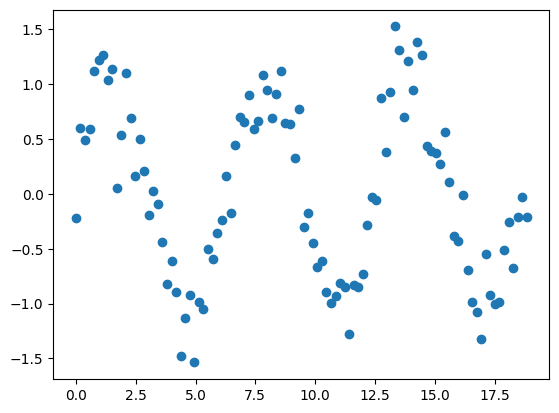

In [12]:
num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
y = np.sin(x) + np.random.normal(0, 0.3, num_points)

plt.scatter(x, y)
plt.show()

### **Preparação das Sequências de Treinamento**

Agora, preparamos as entradas e as saídas alvo para o treinamento da RNN. Cada sequência de entrada será usada para prever o próximo ponto na série temporal.

#### **Explicação do Código**

- **`sequence_length`**: O comprimento da janela da sequência usada como entrada.
- **`inputs`**: Sequências de tamanho `sequence_length` extraídas dos dados.
- **`targets`**: O ponto subsequente na sequência que a rede deve prever.
- **Tensorização**: As sequências são convertidas em tensores PyTorch para uso na rede neural.

In [13]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs = []
targets = []

for i in range(num_points - sequence_length):
    inputs.append(y[i:i+sequence_length])
    targets.append(y[i+sequence_length])

inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

<ipython-input-13-a31d50ca37e9>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)


### **Inicialização da Rede RNN e do Otimizador**

Nesta seção, instanciamos a rede RNN com os tamanhos de entrada, estado oculto, e saída definidos. Também configuramos o critério de perda e o otimizador.

#### **Explicação do Código**

- **`input_size`**: Dimensão da entrada (1, já que estamos lidando com uma série temporal univariada).
- **`hidden_size`**: Número de unidades no estado oculto.
- **`output_size`**: Dimensão da saída (1, pois queremos prever um único valor por vez).

In [14]:
input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

In [15]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [16]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.2897994816303253
Epoch 50, Loss: 0.08346715569496155
Epoch 100, Loss: 0.06693383306264877
Epoch 150, Loss: 0.06219436600804329
Epoch 200, Loss: 0.05706328898668289
Epoch 250, Loss: 0.05498640984296799
Epoch 300, Loss: 0.05156276375055313
Epoch 350, Loss: 0.05130360275506973
Epoch 400, Loss: 0.04434134066104889
Epoch 450, Loss: 0.04136677831411362


### **Geração de Predições com a Rede Treinada**

Após o treinamento, usamos a RNN para gerar previsões de uma nova série temporal. A ideia é prever a continuação da senoide a partir de uma sequência inicial.

#### **Explicação do Código**

- **`predicted_wave`**: Lista para armazenar as predições feitas pela RNN.
- **`input_seq`**: Sequência inicial usada para começar a predição.
- **Passos de predição**:
  - A cada passo, a rede faz uma nova predição que é adicionada à sequência de entrada.
  - A janela de entrada é atualizada para incluir a nova predição e excluir o ponto mais antigo.

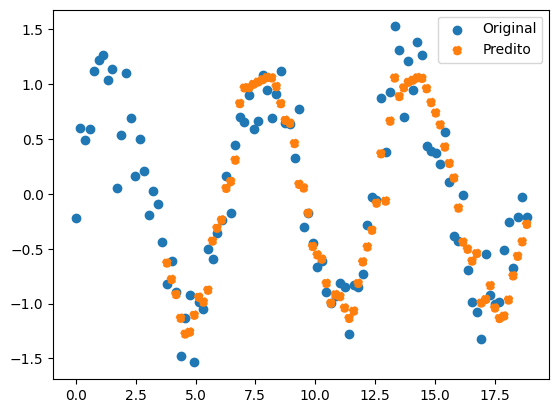

In [17]:
# Gerando predições para uma senoide
predicted_wave = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq)
    predicted_wave.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

## **Exercícios**


### **Exercício 1: Aumentando o Tamanho do Estado Oculto**

1. Aumente o tamanho do estado oculto (`hidden_size`) na rede RNN.
2. Treine a rede novamente com os mesmos dados de entrada.
3. Compare a perda final e as predições da rede com o modelo original.
4. Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?


In [18]:
# @title 1) Aumente o tamanho do estado oculto (hidden_size) na rede RNN.

hidden_size = 16  # Aumentei o hidden_size de 8 para 16 para que a rede tenha mais capacidade de armazenar informações ao longo do tempo


In [19]:
# @title 2) Treine a rede novamente com os mesmos dados de entrada.

# Redefinindo a rede com o novo tamanho do estado oculto
rnn = RNN(input_size=1, hidden_size=hidden_size, output_size=1)

# Critério de perda e otimizador permanecem os mesmos
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

# Treinamento da rede
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Zerando os gradientes antes de cada atualização

    predictions = rnn(inputs)  # Fazendo a previsão da sequência completa
    loss = criterion(predictions, targets)  # Calculando a perda em relação aos targets
    loss.backward()  # Calculando os gradientes com base na perda
    optimizer.step()  # Atualizando os pesos da rede

    if epoch % 50 == 0:  # A cada 50 épocas, imprime a perda
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.558998703956604
Epoch 50, Loss: 0.0808509811758995
Epoch 100, Loss: 0.06710866838693619
Epoch 150, Loss: 0.059993140399456024
Epoch 200, Loss: 0.06068795174360275
Epoch 250, Loss: 0.054668404161930084
Epoch 300, Loss: 0.04533883184194565
Epoch 350, Loss: 0.05611926317214966
Epoch 400, Loss: 0.04235588759183884
Epoch 450, Loss: 0.026076246052980423


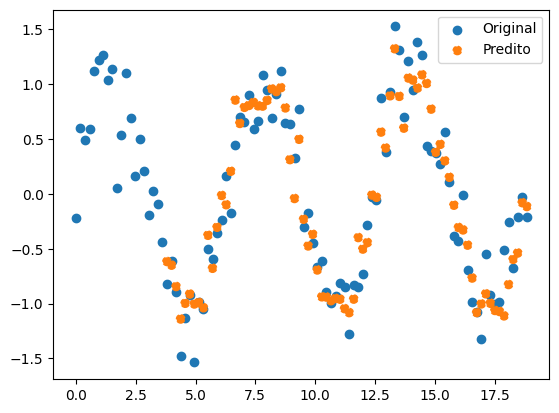

In [20]:
# @title 3) Compare a perda final e as predições da rede com o modelo original.

# Gerando predições com a rede treinada
predicted_wave = []
input_seq = y[:sequence_length].reshape(1, sequence_length, 1)  # Usando a sequência inicial para começar as predições
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq)  # Predizendo o próximo ponto da sequência
    predicted_wave.append(predicted_next.item())  # Salvando a predição
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next.view(1, 1, 1)], dim=1)  # Atualizando a sequência de entrada

# Plotando a senoide original e as predições
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()


#### **4) Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?**

**Resposta:**

O aumento do tamanho do estado oculto geralmente permite que a rede capture mais informações temporais, potencialmente melhorando a precisão das predições. Se o desempenho melhorar (menor perda e predições mais precisas), é um sinal de que o modelo se beneficiou de um estado oculto maior. No entanto, tamanhos muito grandes podem levar a overfitting se o modelo começar a memorizar os dados de treinamento.



### **Exercício 2: Predição de Longo Prazo**

1. Use a RNN treinada para prever 100 pontos futuros da senoide a partir de uma nova sequência inicial de 20 pontos.
2. Aumente o número de camadas ocultas e tente novamente.
2. Compare as predições com a senoide original.
3. Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?


In [21]:
# 1. Definindo um novo modelo com múltiplas camadas ocultas
class MultiLayerRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)  # RNN com múltiplas camadas
        self.fc = nn.Linear(hidden_size, output_size)  # Camada de saída para gerar a previsão final

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)  # Inicializa os estados ocultos
        out, _ = self.rnn(x, h0)  # Processa a sequência completa
        out = self.fc(out[:, -1, :])  # Passa o último estado oculto pela camada linear para obter a previsão
        return out


In [22]:
# 2. Redefinindo a rede com várias camadas ocultas
input_size = 1
hidden_size = 16
output_size = 1
num_layers = 2  # Aumentando o número de camadas ocultas para 2

rnn = MultiLayerRNN(input_size, hidden_size, output_size, num_layers)


In [23]:
# Critério de perda e otimizador permanecem os mesmos
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)


In [24]:
# Treinamento da rede
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()  # Zerando os gradientes antes de cada atualização

    predictions = rnn(inputs)  # Fazendo a previsão da sequência completa
    loss = criterion(predictions, targets)  # Calculando a perda
    loss.backward()  # Calculando os gradientes
    optimizer.step()  # Atualizando os pesos

    if epoch % 50 == 0:  # A cada 50 épocas, imprime a perda
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.5840532183647156
Epoch 50, Loss: 0.0784819945693016
Epoch 100, Loss: 0.06291501224040985
Epoch 150, Loss: 0.05211888998746872
Epoch 200, Loss: 0.04773775488138199
Epoch 250, Loss: 0.04840218275785446
Epoch 300, Loss: 0.03933114558458328
Epoch 350, Loss: 0.025030087679624557
Epoch 400, Loss: 0.006060765590518713
Epoch 450, Loss: 0.003197304904460907


In [25]:

# Prevendo 100 pontos futuros
future_points = 100
predicted_wave = []
input_seq = y[:sequence_length].reshape(1, sequence_length, 1)  # Sequência inicial para predição
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(future_points):
    predicted_next = rnn(input_seq)  # Predizendo o próximo ponto
    predicted_wave.append(predicted_next.item())  # Salvando a predição
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next.view(1, 1, 1)], dim=1)  # Atualizando a sequência de entrada




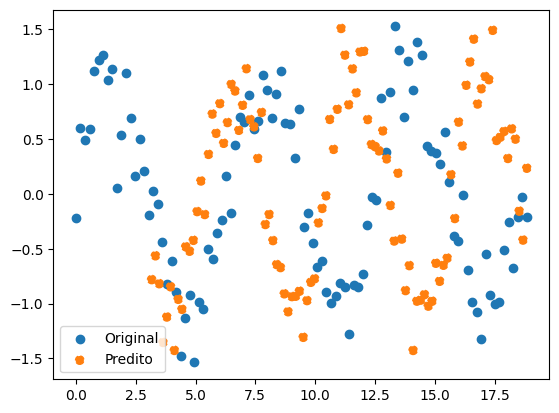

In [26]:
# Plotando a senoide original e as predições
plt.scatter(x, y, label='Original')
plt.scatter(np.linspace(0, 6*np.pi, future_points + sequence_length)[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()


#### Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?

**Resposta:**

A rede consegue manter a forma da senoide por um curto período de tempo, mas à medida que as predições avançam, os erros começam a se acumular. Isso pode causar distorções na forma da senoide, levando a uma perda de precisão e a predições que se desviam do padrão original. Em predições de longo prazo, a rede tende a perder a estabilidade e a forma da senoide se degrada.


### **Exercício 3: Adicionando Ruído**

1. Adicione um ruído gaussiano mais forte à série temporal original (aumente a variância do ruído).
2. Treine a RNN com essa série temporal ruidosa.
3. Compare as predições com o modelo treinado com menos ruído.
4. Pergunta: Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?

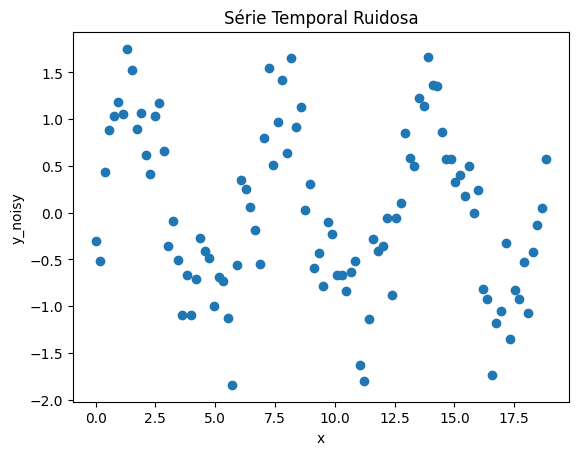

In [33]:
# 1. Gerando série temporal com ruído mais forte
y_noisy = np.sin(x) + np.random.normal(0, 0.5, num_points)  # Variância do ruído aumentada para 0.5

# Visualizando a série temporal ruidosa
plt.scatter(x, y_noisy)
plt.title("Série Temporal Ruidosa")
plt.xlabel("x")
plt.ylabel("y_noisy")
plt.show()


In [34]:
# 2. Preparando as sequências de treinamento com a série ruidosa
inputs_noisy = []
targets_noisy = []

for i in range(num_points - sequence_length):
    inputs_noisy.append(y_noisy[i:i + sequence_length])
    targets_noisy.append(y_noisy[i + sequence_length])

inputs_noisy = torch.tensor(inputs_noisy, dtype=torch.float32).unsqueeze(-1)
targets_noisy = torch.tensor(targets_noisy, dtype=torch.float32).unsqueeze(-1)


In [35]:
# 2. Redefinindo e treinando a rede com dados ruidosos
rnn = MultiLayerRNN(input_size, hidden_size, output_size, num_layers=2)
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

# Treinamento da rede
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Fazendo a previsão com a série ruidosa
    predictions = rnn(inputs_noisy)
    loss = criterion(predictions, targets_noisy)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 0.7798861265182495
Epoch 50, Loss: 0.14240272343158722
Epoch 100, Loss: 0.016829006373882294
Epoch 150, Loss: 0.0042280093766748905
Epoch 200, Loss: 0.001256651128642261
Epoch 250, Loss: 0.0004269807250238955
Epoch 300, Loss: 0.0015786767471581697
Epoch 350, Loss: 0.0003131322446279228
Epoch 400, Loss: 0.00033509472268633544
Epoch 450, Loss: 7.897607429185882e-05


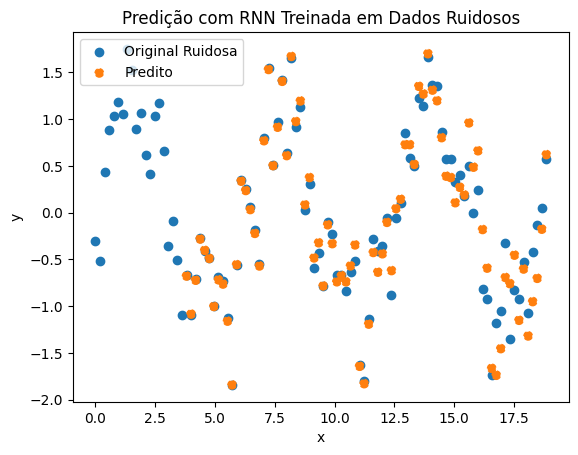

In [36]:
# 3. Prevendo com o modelo treinado em dados ruidosos
predicted_wave_noisy = []
input_seq_noisy = y_noisy[:sequence_length].reshape(1, sequence_length, 1)  # Sequência inicial para predição
input_seq_noisy = torch.tensor(input_seq_noisy, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq_noisy)
    predicted_wave_noisy.append(predicted_next.item())
    input_seq_noisy = torch.cat([input_seq_noisy[:, 1:, :], predicted_next.view(1, 1, 1)], dim=1)

# Plotando a senoide ruidosa original e as predições
plt.scatter(x, y_noisy, label='Original Ruidosa')
plt.scatter(x[sequence_length:], predicted_wave_noisy, label='Predito', linestyle='dashed')
plt.title("Predição com RNN Treinada em Dados Ruidosos")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


 #### Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?
  
  
**Resposta:**

O aumento do ruído nos dados de entrada dificulta para a RNN a tarefa de identificar e prever padrões na série temporal. Isso geralmente resulta em uma perda maior durante o treinamento, menor precisão nas predições, e uma tendência das predições a se desviarem mais do padrão original ao longo do tempo. A RNN pode começar a capturar o ruído em vez dos padrões reais da série temporal, o que leva a um desempenho degradado.

